<a href="https://colab.research.google.com/github/Nikunjbansal99/BaseballPlayersSalaryPrediction/blob/main/PredictionUsingLasso%26RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


*   Importing Basic Libraries
*   Importing Data
*   Performing Descriptive Analysis of the dataset to know data better
*   Processing Categorical Values
*   Perform Label Encoding on Categorical Values.
*   Checking null values
*   Creating test_df by assigning tuples which have null value as target feature value.
*   Creating train_df by dropping tuples which have null value as target feature value.
*   Analysis of Target Variable using Scatter Plot, distplot, Correlation Matrix & Heat Map
*   Applying Feature Selection to get top 13 most Correlated features w.r.t Target Feature
*   Perform analysis on selected features w.r.t Target Feature i.e. Salary using regplot & pairplot
*   Splitting selected_train_df into 70% and 30% to construct training data and cross validation data respectively
*   Apply Ridge and Lasso Regression models
*   Evaluation
*   Visualization
*   Perform Prediction on Actual Test Data
*   Save it in .csv format.













# **Importing basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# **Importing Data**

In [ ]:
input_data_dir = ""
full_df = pd.read_excel(os.path.join(input_data_dir, "Hitters.xlsx"))

# **Descriptive Analysis of the dataset**

In [ ]:
print("Size of full dataset       : {}".format(full_df.shape))

Size of full dataset       : (322, 20)


## **Data Description**

### **Full Data**

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


**Processing Categorical value**

In [ ]:
full_df_not_encode = full_df.drop(['NewLeague', 'Division', 'League'], axis=1)
full_df_not_encode.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [ ]:
full_df_encode = pd.DataFrame([full_df.NewLeague, full_df.Division, full_df.League]).transpose()

In [ ]:
full_df_encode.head()

,NewLeague,Division,League
0,A,E,A
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N


In [ ]:
le = LabelEncoder()
for i in full_df_encode:
    full_df_encode[i]=le.fit_transform(full_df_encode[i])

In [ ]:
full_df = pd.concat([full_df_encode, full_df_not_encode], axis=1)

## **NULL VALUES**

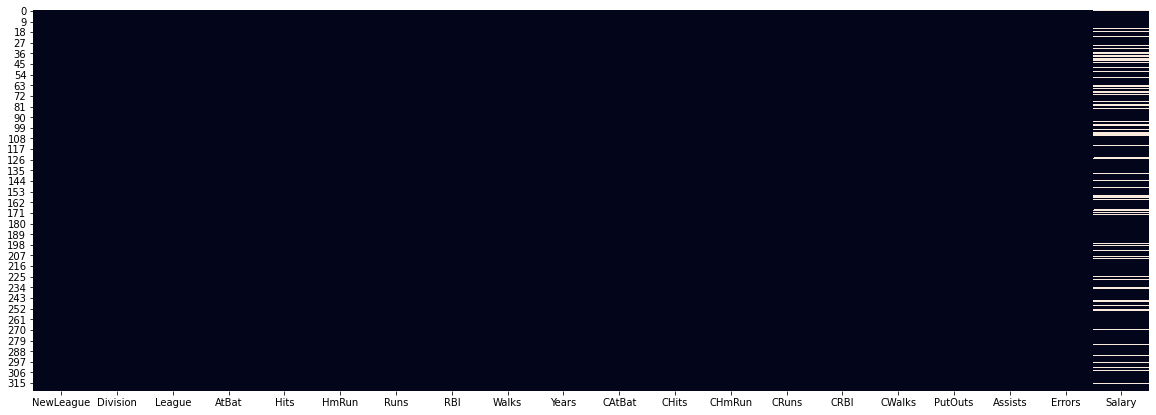

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(full_df.isnull(), cbar=False)        #plotting heatmap using sns library to find missing values in train_df
plt.show()

**Salary Feature has some missing values so we can place those tuples in test_df.**

In [ ]:
test_df = full_df[full_df.isnull().any(axis=1)]

In [ ]:
test_df.head(10)

,NewLeague,Division,League,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,0,0,0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
15,0,1,0,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN
18,0,1,0,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN
22,0,1,0,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN
30,0,1,0,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN
32,1,1,1,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN
36,0,0,0,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN
38,0,0,0,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,NaN
39,1,1,1,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,NaN
41,1,1,1,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,NaN


**Hence, drop above tuples from full_df to construct train_df.**

In [ ]:
train_df = full_df.dropna()

In [ ]:
train_df.head(10)

,NewLeague,Division,League,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,1,1,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000
2,0,1,0,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000
3,1,0,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000
4,1,0,1,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500
5,0,1,0,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000
6,0,0,1,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000
7,0,1,0,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000
8,1,1,1,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000
9,0,0,0,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000
10,0,0,0,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143


**Now, Our Training data is free from Missing values.**

# **Analysis of Target Variable**

Text(0.5, 1.0, 'Distribution of target variable')

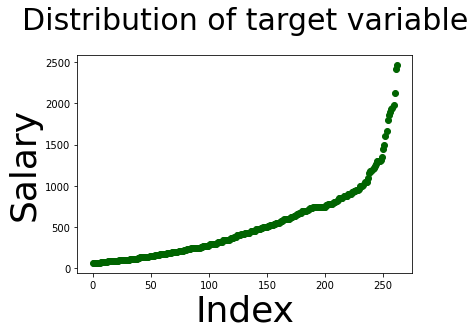

In [ ]:
X = train_df.Salary.sort_values().reset_index().index                    
y = train_df.Salary.sort_values().reset_index()["Salary"]                   # Sort tuples based on price value 
plt.scatter(X, y, color = "darkgreen")                                      # Plotting the scatter plot b/w Salary Vs Index
plt.xlabel("Index", size=36)
plt.ylabel("Salary", size=36)
plt.title("Distribution of target variable", size=30, pad=26)

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64


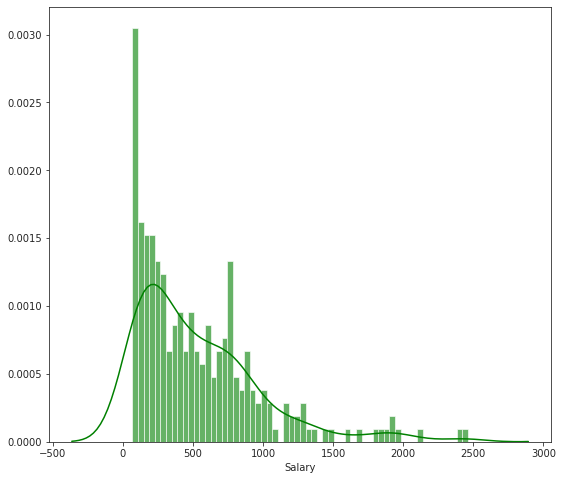

In [ ]:
print(train_df['Salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df['Salary'], color='g', bins=60, hist_kws={'alpha': 0.6});

**Hence, it is found that our Target Variable i.e. Salary is Right Skewed.**

# **`Correlation Matrix and Heat Map`**



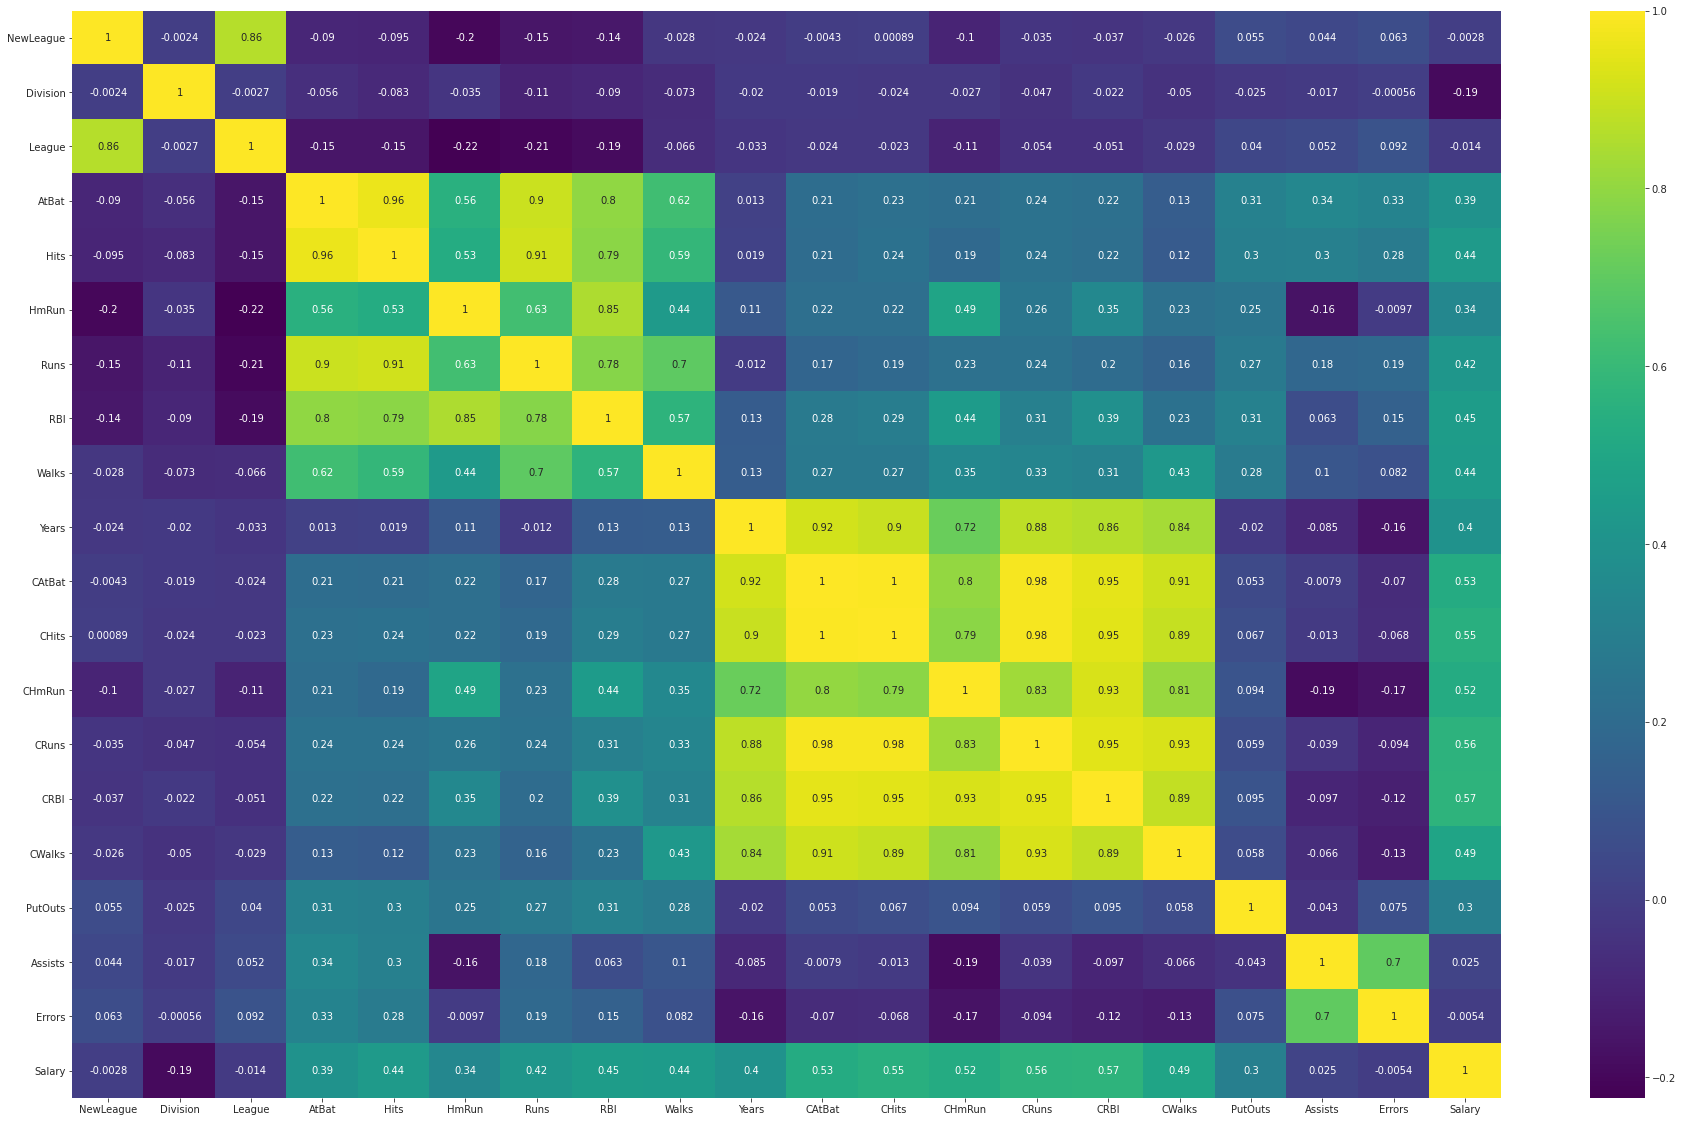

In [ ]:
corr_data = train_df.corr()                       # calculating correlation data between features
plt.figure(figsize=(32, 20))                      # setting figure size
sns.set_style('ticks')                            # setting plot style
sns.heatmap(corr_data, cmap='viridis',annot=True)                # plotting heatmap using sns library
plt.show()

## **The 13 most Important features for predicting Salary.**

**Applied Feature Selection**

In [ ]:
corr_data.Salary.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:20][::-1].plot(kind='barh',color='yellowgreen')  # calculating top 13 highest correlated faetures
                                                                                                                                # with respect to target variable i.e. "price"
plt.title("Top 13 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [ ]:
# Dropping rest of the features from train_df while taking only top 13 features selected above.
train_df_X = train_df.drop(['NewLeague', 'Division', 'League',"PutOuts","Assists","Errors","Salary"], axis=1)
train_df_X.shape    # print shape of train_df_X

(263, 13)

In [ ]:
train_df_X.head()           # print top 5 tuples of train_df_X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
1,315,81,7,24,38,39,14,3449,835,69,321,414,375
2,479,130,18,66,72,76,3,1624,457,63,224,266,263
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354
4,321,87,10,39,42,30,2,396,101,12,48,46,33
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194


In [ ]:
train_df_y = train_df.Salary
train_df_y.shape            # print shape of train_df_y

(263,)

In [ ]:
train_df_y.head()           # print top 5 tuples of train_df_y

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [ ]:
selected_train_df = pd.concat([train_df_X, train_df_y] ,axis=1)

### **Here, we analyze only selected Features:**

In [ ]:
features_to_analyze = selected_train_df.columns

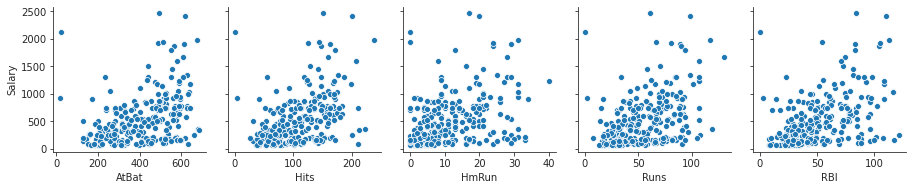

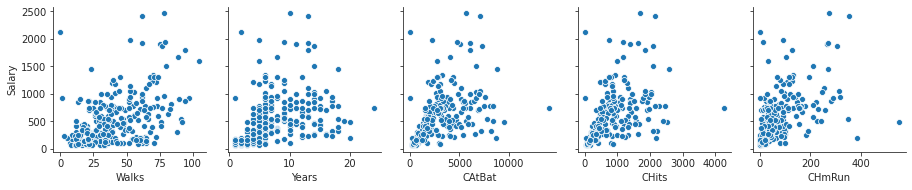

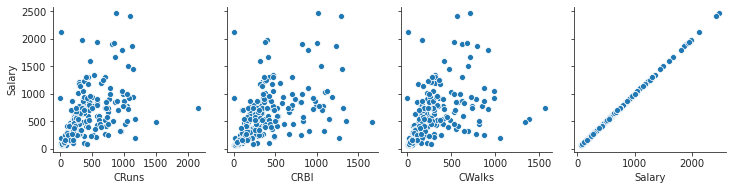

In [ ]:
for i in range(0, len(features_to_analyze), 5):
    sns.pairplot(data=selected_train_df, x_vars=selected_train_df.columns[i:i+5], y_vars=['Salary'])

**We can clearly identify some relationships. Almost all selected features seems to have a relationship with the Salary.**

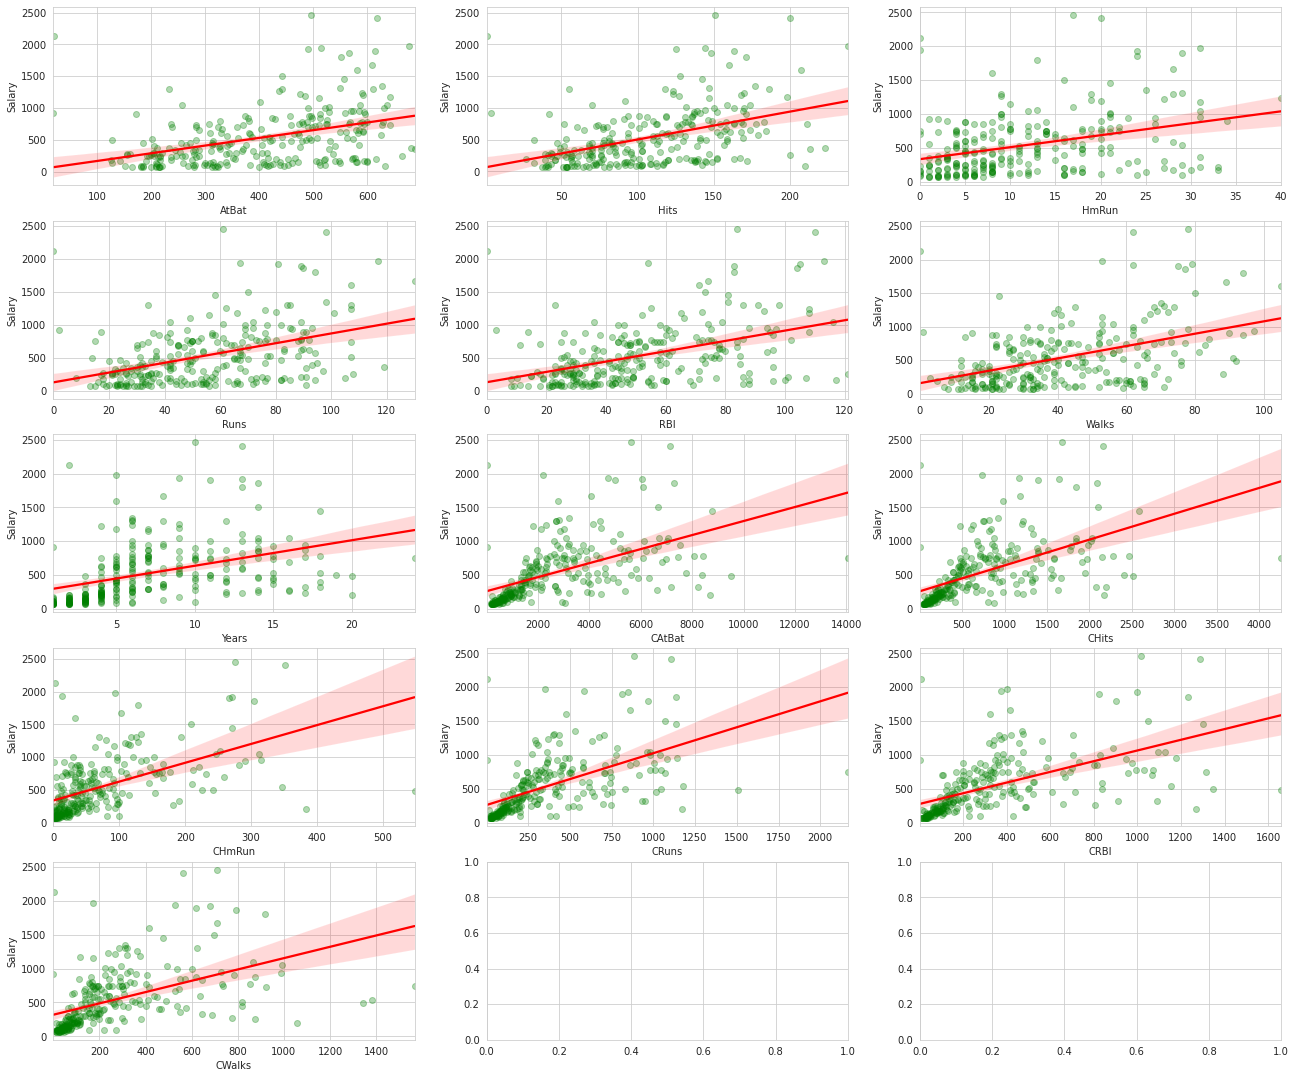

In [ ]:
fig, ax = plt.subplots(round(len(features_to_analyze) / 3), 3, figsize = (22, 19))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyze) - 1:
        sns.set_style("whitegrid")
        sns.regplot(x=features_to_analyze[i], y= 'Salary', data=selected_train_df[features_to_analyze], ax=ax, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red'})

**From regplot, We can clearly see that Years and HmRun have linear relationship with Salary. Rest of the features have big spread around line.**

In [ ]:
# Splitting selected_train_df into 70% and 30% to construct training data and cross validation data respectively.
trainX, cvX, trainy, cvy = train_test_split(train_df_X, train_df_y,test_size=0.3, random_state=12) 

In [ ]:
# Dropping rest of the features from test_df while taking only top 10 features selected above.
test_df_X = test_df.drop(['NewLeague', 'Division', 'League',"PutOuts","Assists","Errors","Salary"], axis=1)
test_df_X.shape        # print shape of test_df_X

(59, 13)

In [ ]:
test_df_X.head()        # print top 5 tuples of test_df_X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
0,293,66,1,30,29,14,1,293,66,1,30,29,14
15,183,39,3,20,15,11,3,201,42,3,20,16,11
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653
22,22,10,1,4,2,1,6,84,26,2,9,9,3
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087


In [ ]:
test_df_y = test_df.Salary
test_df_y.shape             # print shape of test_df_y

(59,)

In [ ]:
test_df_y.head()            # print top 5 tuples of test_df_y

0    NaN
15   NaN
18   NaN
22   NaN
30   NaN
Name: Salary, dtype: float64

## **Ridge Regression Model**

In [ ]:
alpha_list = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 5e-2, 1, 5, 10, 20]

for alpha in alpha_list:
    ridgeReg = Ridge(alpha, normalize=True)
    ridgeReg.fit(trainX, trainy)

    print("alpha: ", alpha)
    print("R^2 score (training): {0:.3f}".format(ridgeReg.score(trainX, trainy)))
    print("R^2 score (validation): {0:.3f}\n".format(ridgeReg.score(cvX, cvy)))

alpha:  1e-15
R^2 score (training): 0.492
R^2 score (validation): 0.417

alpha:  1e-10
R^2 score (training): 0.492
R^2 score (validation): 0.417

alpha:  1e-08
R^2 score (training): 0.492
R^2 score (validation): 0.417

alpha:  0.0001
R^2 score (training): 0.492
R^2 score (validation): 0.422

alpha:  0.001
R^2 score (training): 0.491
R^2 score (validation): 0.444

alpha:  0.01
R^2 score (training): 0.482
R^2 score (validation): 0.486

alpha:  0.05
R^2 score (training): 0.455
R^2 score (validation): 0.505

alpha:  1
R^2 score (training): 0.388
R^2 score (validation): 0.495

alpha:  5
R^2 score (training): 0.316
R^2 score (validation): 0.412

alpha:  10
R^2 score (training): 0.249
R^2 score (validation): 0.324

alpha:  20
R^2 score (training): 0.172
R^2 score (validation): 0.223



So, we selected alpha value as 0.05 as it has highest R^2 score during validation having value 0.505 and this value is just enough for good model.

In [ ]:
ridgeReg = Ridge(alpha=0.05, normalize=True)    # Creating Ridge Regression Model using alpha value as 0.05 and putting normalize parameter as True.
ridgeReg.fit(trainX, trainy)                    # Training Ridge Regression Model

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
predictedy = ridgeReg.predict(cvX)    # Taking Prediction on validation data which we created earlier i.e. 30% of selected_train_df

## **Evaluation**

In [ ]:
print("---------Coefficient of determination---------")
print("R^2 score (training): {0:.3f}".format(ridgeReg.score(trainX, trainy)))
print("R^2 score (validation): {0:.3f}".format(ridgeReg.score(cvX, cvy)))

---------Coefficient of determination---------
R^2 score (training): 0.455
R^2 score (validation): 0.505


## **Visualization**

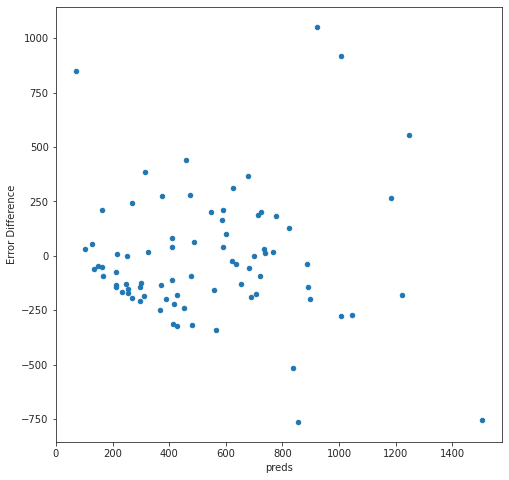

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

preds = pd.DataFrame({"preds":predictedy, "true":cvy})
preds["Error Difference"] = preds["true"] - preds["preds"]                  # Calculating Error Difference
preds.plot(x = "preds", y = "Error Difference", kind = "scatter")

Text(0, 0.5, 'Prediction')

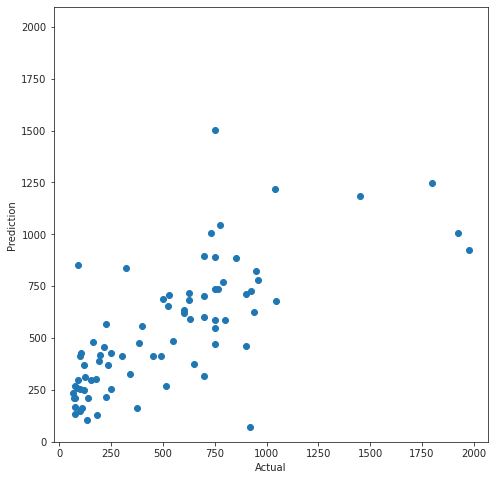

In [ ]:
plt.scatter(cvy,predictedy)                                 #Plot Scatter plot b/w Actual and Prediction value of Target variable
plt.axis('square')
plt.xlabel('Actual')
plt.ylabel('Prediction')



## **Predictions on Actual Test Data:**

In [ ]:
pred_df_y = ridgeReg.predict(test_df_X)
outputdataFrame=pd.DataFrame({'Salary':pred_df_y})

In [ ]:
#Save to csv
outputdataFrame.to_csv('ridge_output.csv',index=False)
outputdataFrame.head()

,Salary
0,175.283089
1,98.396746
2,795.091300
3,18.199541
4,774.189553


# **Lasso Regression Model**

In [ ]:
alpha_list = [1e-8, 1e-4, 1e-3, 1e-2, 2e-1, 3e-1, 34e-2, 5e-2, 1, 5, 10, 20]

for alpha in alpha_list:
    lassoReg = Lasso(alpha, normalize=True)
    lassoReg.fit(trainX, trainy)

    print("alpha: ", alpha)
    print("R^2 score (training): {0:.3f}".format(lassoReg.score(trainX, trainy)))
    print("R^2 score (validation): {0:.3f}\n".format(lassoReg.score(cvX, cvy)))

alpha:  1e-08
R^2 score (training): 0.492
R^2 score (validation): 0.416

alpha:  0.0001
R^2 score (training): 0.492
R^2 score (validation): 0.416

alpha:  0.001
R^2 score (training): 0.492
R^2 score (validation): 0.417

alpha:  0.01
R^2 score (training): 0.492
R^2 score (validation): 0.423

alpha:  0.2
R^2 score (training): 0.476
R^2 score (validation): 0.492

alpha:  0.3
R^2 score (training): 0.468
R^2 score (validation): 0.497

alpha:  0.34
R^2 score (training): 0.464
R^2 score (validation): 0.497

alpha:  0.05
R^2 score (training): 0.490
R^2 score (validation): 0.447

alpha:  1
R^2 score (training): 0.415
R^2 score (validation): 0.479

alpha:  5
R^2 score (training): 0.378
R^2 score (validation): 0.430

alpha:  10
R^2 score (training): 0.267
R^2 score (validation): 0.302

alpha:  20
R^2 score (training): 0.000
R^2 score (validation): -0.001



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9980008.481151765, tolerance: 3927.4503382062235
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7328948.1631191755, tolerance: 3927.4503382062235
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111371.9919097647, tolerance: 3927.4503382062235
  positive)


So, we selected alpha value as 0.3 as it has highest R^2 score during validation having value 0.497 and this value is just enough for good model.

In [ ]:
LassoReg = Lasso(alpha=0.3, normalize=True)     # Creating Lasso Regression Model using alpha value as 0.3 and by putting normalize parameter as True.              
LassoReg.fit(trainX, trainy)                    # Training Lasso Regression Model

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
predictedy = LassoReg.predict(cvX)               # Taking Prediction on validation data which we created earlier i.e. 30% of selected_train_df

# **Evaluation**

In [ ]:
print("---------Coefficient of determination---------")
print("R^2 score (training): {0:.3f}".format(LassoReg.score(trainX, trainy)))
print("R^2 score (validation): {0:.3f}".format(LassoReg.score(cvX, cvy)))

---------Coefficient of determination---------
R^2 score (training): 0.468
R^2 score (validation): 0.497


# **Visualization**

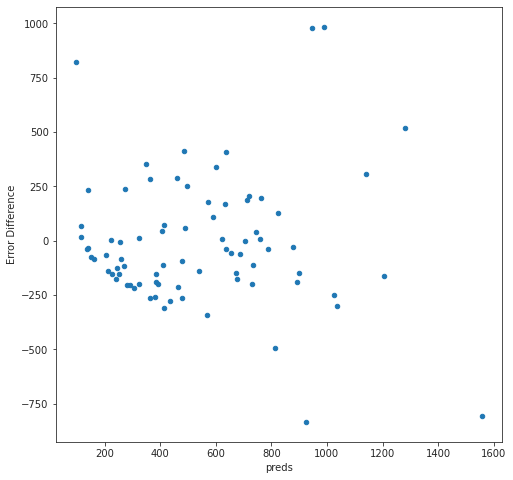

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

preds = pd.DataFrame({"preds":predictedy, "true":cvy})
preds["Error Difference"] = preds["true"] - preds["preds"]                          # Calculating Error Difference
preds.plot(x = "preds", y = "Error Difference", kind = "scatter")

Text(0, 0.5, 'Prediction')

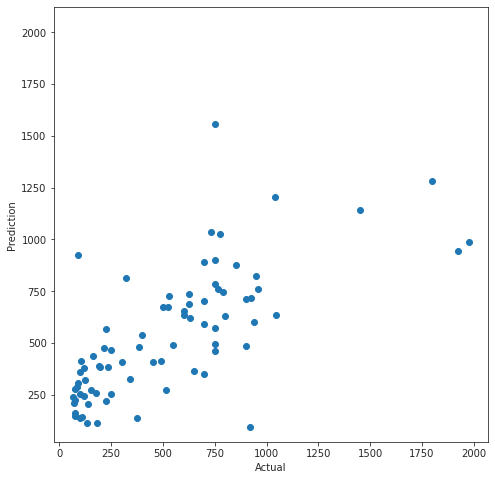

In [ ]:
plt.scatter(cvy,predictedy)                                 #Plot Scatter plot b/w Actual and Prediction value of Target variable
plt.axis('square')
plt.xlabel('Actual')
plt.ylabel('Prediction')



# **Predictions on Actual Test Data:**

In [ ]:
pred_df_y = LassoReg.predict(test_df_X)
outputdataFrame=pd.DataFrame({'Salary':pred_df_y})

In [ ]:
#Save to csv
outputdataFrame.to_csv('Lasso_output.csv',index=False)
outputdataFrame.head()

,Salary
0,150.055603
1,95.132705
2,752.616198
3,54.469993
4,775.978024


**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>